# Лабораторная работа №6
*Вариант 2*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

In [7]:
def find_maximum_on_interval(
    func: Callable[[float], float],
    a: float,
    b: float,
    method: str = 'golden',
    tol: float = 1e-6,
    max_iter: int = 100
) -> Tuple[float, float, dict]:
    if a >= b:
        raise ValueError("Левая граница должна быть меньше правой границы")
    neg_func = lambda x: -func(x)
    
    if method == 'golden':
        return _golden_section_search(func, a, b, tol, max_iter)
    elif method == 'ternary':
        return _ternary_search(func, a, b, tol, max_iter)
    elif method == 'parabolic':
        return _parabolic_interpolation(func, a, b, tol, max_iter)
    else:
        raise ValueError(f"Неизвестный метод: {method}. Используйте 'golden', 'ternary' или 'parabolic'")

def _golden_section_search(
    func: Callable[[float], float],
    a: float,
    b: float,
    tol: float,
    max_iter: int
) -> Tuple[float, float, dict]:
    phi = (np.sqrt(5) - 1) / 2  # золотое сечение
    iter_count = 0
    
    x1 = b - phi * (b - a)
    x2 = a + phi * (b - a)
    
    f1 = func(x1)
    f2 = func(x2)
    
    while abs(b - a) > tol and iter_count < max_iter:
        if f1 > f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - phi * (b - a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + phi * (b - a)
            f2 = func(x2)
        
        iter_count += 1
    
    x_max = (a + b) / 2
    f_max = func(x_max)
    
    info = {
        'method': 'golden_section',
        'iterations': iter_count,
        'error': abs(b - a),
        'converged': iter_count < max_iter
    }
    
    return x_max, f_max, info

def _ternary_search(
    func: Callable[[float], float],
    a: float,
    b: float,
    tol: float,
    max_iter: int
) -> Tuple[float, float, dict]:
    iter_count = 0
    
    while abs(b - a) > tol and iter_count < max_iter:
        m1 = a + (b - a) / 3
        m2 = b - (b - a) / 3
        
        f1 = func(m1)
        f2 = func(m2)
        
        if f1 < f2:
            a = m1
        else:
            b = m2
        
        iter_count += 1
    
    x_max = (a + b) / 2
    f_max = func(x_max)
    
    info = {
        'method': 'ternary_search',
        'iterations': iter_count,
        'error': abs(b - a),
        'converged': iter_count < max_iter
    }
    
    return x_max, f_max, info

def _parabolic_interpolation(
    func: Callable[[float], float],
    a: float,
    b: float,
    tol: float,
    max_iter: int
) -> Tuple[float, float, dict]:
    x1 = a
    x2 = (a + b) / 2
    x3 = b
    
    f1 = func(x1)
    f2 = func(x2)
    f3 = func(x3)
    
    iter_count = 0
    x_old = x2
    
    for _ in range(max_iter):
        numerator = (x2 - x1)**2 * (f2 - f3) - (x2 - x3)**2 * (f2 - f1)
        denominator = (x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)
        
        if abs(denominator) < 1e-12:
            break
            
        x_new = x2 - 0.5 * numerator / denominator
        
        if x_new < a or x_new > b:
            x_new = (a + b) / 2
        
        f_new = func(x_new)
        
        if x_new > x2:
            if f_new > f2:
                x1, f1 = x2, f2
                x2, f2 = x_new, f_new
            else:
                x3, f3 = x_new, f_new
        else:
            if f_new > f2:
                x3, f3 = x2, f2
                x2, f2 = x_new, f_new
            else:
                x1, f1 = x_new, f_new
        
        iter_count += 1
        
        if abs(x_new - x_old) < tol:
            break
            
        x_old = x_new
    
    x_max = x2
    f_max = f2
    
    info = {
        'method': 'parabolic_interpolation',
        'iterations': iter_count,
        'error': abs(x_new - x_old),
        'converged': iter_count < max_iter
    }
    
    return x_max, f_max, info

def find_maximum_global(
    func: Callable[[float], float],
    a: float,
    b: float,
    n_points: int = 100,
    method: str = 'golden',
    tol: float = 1e-6
) -> Tuple[float, float, dict]:
    x_samples = np.linspace(a, b, n_points)
    f_samples = func(x_samples)
    
    candidates = []
    
    candidates.append((a, func(a)))
    candidates.append((b, func(b)))
    
    for i in range(1, n_points - 1):
        if f_samples[i] > f_samples[i-1] and f_samples[i] > f_samples[i+1]:
            candidates.append((x_samples[i], f_samples[i]))
    
    best_x, best_f = None, -np.inf
    all_info = []
    
    for x_candidate, f_candidate in candidates:
        search_a = max(a, x_candidate - (b - a) / 10)
        search_b = min(b, x_candidate + (b - a) / 10)
        
        x_local, f_local, info = find_maximum_on_interval(
            func, search_a, search_b, method, tol
        )
        
        all_info.append(info)
        
        if f_local > best_f:
            best_f = f_local
            best_x = x_local
    
    info_global = {
        'method': f'global_search_with_{method}',
        'n_candidates': len(candidates),
        'best_candidate_found': best_f
    }
    
    return best_x, best_f, info_global
def vizualize(f, x_max, a, b, func_name='f(x)', title='Поиск максимума'):
    x_plot = np.linspace(a, b, 1000)
    y_plot = f(x_plot)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, 'b-', label='Функция ' + func_name)
    plt.axvline(x_max, color='r', linestyle='--', label=f'Максимум: x={x_max:.3f}')
    plt.scatter([a, b], [f(a), f(b)], color='g', 
               label='Граничные точки')
    plt.xlabel('x')
    plt.ylabel(func_name)
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

## Задача 1
Вычислить значение интеграла $I=\int\limits_0^2 P_m (x)dx$, где $P_m(x) = \sum\limits_{i=0}^m c_i x^i$, с помощью квадратурных формул левых прямоугольников и по формуле трапеций с точностью $\varepsilon = 10^{-14}$ . Вычислить интеграл по формуле Гаусса.

In [35]:
# Условие
c = np.array([1, 0.9, 0.8, 0.7, 0, 2.2, -4.1, 0, -3.4, 3.5])

def P_m(x, c=c):
    x = np.asarray(x)
    m = len(c)
    if x.ndim == 0:
        x_powers = x ** np.arange(0, m)
    else:
        x_powers = x[:, np.newaxis] ** np.arange(0, m)
    return np.dot(x_powers, c)
eps = 10**-14
a = 0
b = 2


display(Markdown(fr"""
Условие:   
$P_m = {" ".join(f"{c[i]:+} x^{i}"for i in range(len(c)))}$  
$\varepsilon = {eps}$  
$a = {a}$  
$b = {b}$  
"""))


Условие:   
$P_m = +1.0 x^0 +0.9 x^1 +0.8 x^2 +0.7 x^3 +0.0 x^4 +2.2 x^5 -4.1 x^6 +0.0 x^7 -3.4 x^8 +3.5 x^9$  
$\varepsilon = 1e-14$  
$a = 0$  
$b = 2$  


In [43]:
# Аналитическое решение(Формула Ньютона-Лейбница)
c_pred = c * (1/np.arange(1, len(c) + 1))
I = P_m(b, c_pred) - P_m(a, c_pred) 
I

np.float64(60.10317460317464)

In [45]:
# Левые прямоугольники
def left_rectangle_integral(n, f_func=P_m, a=a, b=b):
    h = (b - a) / n
    # x_points = np.linspace(a, b, n-1)
    result = 0
    xi = a
    for i in range(n-1):
        result += f_func(xi)
        xi += h
    # return np.sum(f_func(x_points)) * h
    return result * h

display(Markdown(r"""
*left_rectangle_integral(n, f_func=P_m, a=a, b=b)*  
$I_{\text{left}}(n) = h \sum_{k=0}^{n-1} f(x_k)
\quad \text{где } 
x_k = a + k \cdot h, \ 
h = \frac{b - a}{n}$
"""))


*left_rectangle_integral(n, f_func=P_m, a=a, b=b)*  
$I_{\text{left}}(n) = h \sum_{k=0}^{n-1} f(x_k)
\quad \text{где } 
x_k = a + k \cdot h, \ 
h = \frac{b - a}{n}$


In [5]:
# Трапеции
def trapezoidal_integral(n, f_func=P_m, a=a, b=b):
    h = (b - a) / n
    x_points = np.linspace(a, b, n + 1)
    y_points = f_func(x_points)
    return h * (0.5 * (y_points[0] + y_points[-1]) + np.sum(y_points[1:-1]))

display(Markdown(r"""
*trapezoidal_integral(n, f_func=P_m, a=a, b=b)*  
$I_{\text{trap}}(n) = \frac{h}{2} \left[ f(a) + 2\sum_{k=1}^{n-1} f(x_k) + f(b) \right]
\quad \text{где } 
x_k = a + k \cdot h, \ 
h = \frac{b - a}{n}$
"""))


*trapezoidal_integral(n, f_func=P_m, a=a, b=b)*  
$I_{\text{trap}}(n) = \frac{h}{2} \left[ f(a) + 2\sum_{k=1}^{n-1} f(x_k) + f(b) \right]
\quad \text{где } 
x_k = a + k \cdot h, \ 
h = \frac{b - a}{n}$


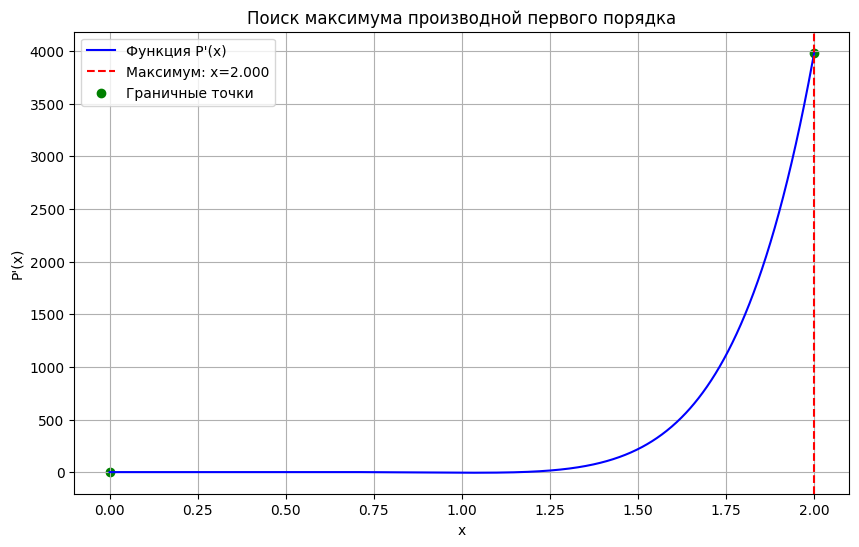

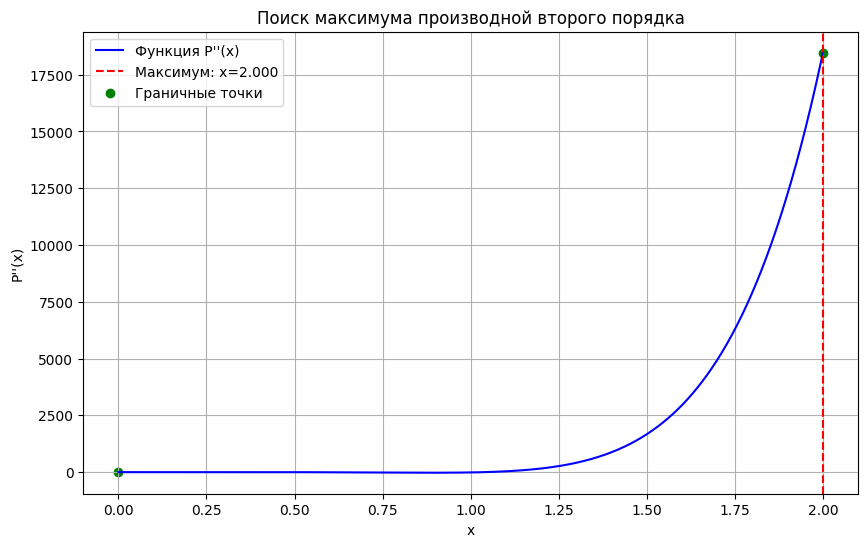

In [8]:
# Вычисления максимумов производных первого и второго порядков посредством метода золотого сечения
c_prime = c[1:] * np.arange(1, len(c))
def P_prime(x):
    return P_m(x, c=c_prime)

c_double = c_prime[1:] * np.arange(1, len(c_prime))
def P_double(x):
    return P_m(x, c=c_double)

x_M1, M1, _ = find_maximum_global(P_prime, a, b)
x_M2, M2, _ = find_maximum_global(P_double, a, b)

vizualize(P_prime, x_M1, a, b, func_name="P'(x)", title='Поиск максимума производной первого порядка')
vizualize(P_double, x_M2, a, b, func_name="P''(x)", title='Поиск максимума производной второго порядка')

In [46]:
# Определение n
# Метод левых прямоугольников
# n ≥ (b-a)² * M1 / (2ε)
n_left_min = (b - a)**2 * M1 / (2 * eps)
n_left = int(np.ceil(n_left_min))
h_left = (b - a) / n_left
error_left = (b - a)**2 * M1 / (2 * n_left)

# Метод трапеций
# n ≥ sqrt((b-a)³ * M2 / (12ε))
n_trap_min = np.sqrt((b - a)**3 * M2 / (12 * eps))
n_trap = int(np.ceil(n_trap_min))
h_trap = (b - a) / n_trap
error_trap = (b - a)**3 * M2 / (12 * n_trap**2)

display(Markdown(fr"""

**Метод левых прямоугольников**:  
$\quad\quad n = {n_left:e}$  
$\quad\quad h = {h_left:e}$  
$\quad\quad R \le {error_left:e}$

**Метод трапеций**:  
$\quad\quad n = {n_trap:e}$  
$\quad\quad h = {h_trap:e}$  
$\quad\quad R \le {error_trap:e}$

"""))

left_rectangle_integral(n_left)



**Метод левых прямоугольников**:  
$\quad\quad n = 7.967386e+17$  
$\quad\quad h = 2.510233e-18$  
$\quad\quad R \le 1.000000e-14$

**Метод трапеций**:  
$\quad\quad n = 1.109486e+09$  
$\quad\quad h = 1.802637e-09$  
$\quad\quad R \le 1.000000e-14$



KeyboardInterrupt: 

In [48]:
def sum_powers_up_to_9(n):
    """S[j] = sum(i^j, i=0..n-1) для j=0..9"""
    n0 = n
    n1 = n0
    n2 = n1 * n0
    n3 = n2 * n0
    n4 = n3 * n0
    n5 = n4 * n0
    n6 = n5 * n0
    n7 = n6 * n0
    n8 = n7 * n0
    n9 = n8 * n0
    
    S = [0]*10
    
    S[0] = n
    S[1] = n1 * (n1 - 1) // 2
    S[2] = (n1 - 1) * n1 * (2*n1 - 1) // 6
    S[3] = ((n1 - 1) * n1 // 2) ** 2
    S[4] = (n1 - 1) * n1 * (2*n1 - 1) * (3*n2 - 3*n1 - 1) // 30
    S[5] = (n2 - n1) ** 2 * (2*n2 - n1 - 1) // 12
    S[6] = (n1 - 1) * n1 * (2*n1 - 1) * (3*n4 - 6*n3 + 3*n1 + 1) // 42
    S[7] = (n2 - n1) ** 2 * (3*n4 - 6*n3 - n2 + 4*n1 - 1) // 24
    S[8] = (n1 - 1) * n1 * (2*n1 - 1) * (5*n6 - 15*n5 + 5*n4 + 15*n3 - n2 - 9*n1 - 3) // 90
    S[9] = (n2 - n1) ** 2 * (2*n6 - 6*n5 + n4 + 8*n3 - n2 - 6*n1 + 3) // 20
    
    return S

def left_rectangle_poly9(n, coeffs, a, b):
    """
    coeffs: [c0, c1, c2, ..., c9] - 10 коэффициентов (степень ≤9)
    a, b: границы
    n: любое целое (1e17, 1e100 - не важно)
    """
    h = (b - a) / n
    S = sum_powers_up_to_9(n)
    
    from math import comb
    
    total = 0.0
    for k in range(10):  # 0..9
        ck = coeffs[k]
        if ck == 0:
            continue
        
        # sum_{i=0}^{n-1} (a + i*h)^k
        sum_k = 0.0
        for j in range(k + 1):
            binom = comb(k, j)
            sum_k += binom * (a ** (k - j)) * (h ** j) * S[j]
        
        total += ck * sum_k
    
    return total * h

In [51]:
left_rectangle_poly9(n_left, c, a, b)

np.float64(122.20634920634915)